This is a quick guide to running the Wesleyan python disk modeling code. It is based heavily on Katherine Rosenfeld's original idl code (Rosenfeld et al. 2013, among others), which is based on the structure in Dartois et al. 2003. More detail on the underlying disk structure used in this code can be found in Flaherty et al. 2015.

The general purpose of this code is to general a model image from a parametric model of a protoplanetary/debris disk. It has been used extensively in constraining turbulence from gas line observations (Flaherty et al. 2015, 2017a, 2018) and gas structure within debris disks (Flaherty et al. 2016). Additional functionality has been included for modeling dust emission, in particular dust emission around debris disks (Daly et al. 2018). 

# Calculating Disk Structure:

The code is currently split into three main programs: one calculates the disk structure (ie. density and temperature as a function of location within the disk), one performs the radiative transfer calculation, and one handles log-likelihood comparisons to data. 

The disk structure calculation is handled in a similar manner by a number of different pieces of code. Each of these files defines a 'Disk' class of objects, and calculates the gas and/or dust density and temperature as a function of position within the disk. The density and temperature structure is then interpolated onto a radiative transfer grid, that is aligned with the line of sight and is used later for the radiative transer calculation.

There are files for protoplanetary disks (disk.py), disks with simple power law surface density profiles (disk_pow.py), eccentric disks (disk_ecc.py), and debris disks (debris_disk.py). While the assumed underlying functional forms of the density and temperature structure vary between the different models, the outputs of the model (density and temperature as a function of position) are similar. This allows for a disk object generated from any one of these codes to be inserted into the radiative transfer code without any adjustements by the user.

The example below is for an object created using disk.py, although similar objects, and functionality, are available in disk_pow.py, disk_ecc.py, and debris_disk.py. The required inputs will vary between the different models, as described in more detail below.



The simplest way to create a disk object is:

In [1]:
from disk import *
x=Disk()

disk.py:164: RuntimeWarning: invalid value encountered in sqrt
  Omg = np.sqrt((dPdr/(rcf*self.rho0)+Disk.G*self.Mstar/(rcf**2+zcf**2)**1.5))


This creates an instance of the Disk class, called 'x', with all of the generic parameters. The other disk models can be imported in a similar manner (e.g. `from debris_disk import *`), and the disk object is created using the same code (`x=Disk()`). 

Each model uses a list of parameters (`params`) to set the underlying structure. Given that each model assumes a different functional form for the underlying density and temperature structure, they require a different set of input parameters. 

### disk.py

*Protoplanetary disk structure*

This model uses parametric forms of the temperature and density structure that are mean to represent protoplanetary disks, with a vertical temperature gradient, and a self-similar surface density distribution. 

$$T_{atm} = T_{atm0} \left(\frac{r}{150 au}\right)^{q}$$
$$T_{mid} = T_{mid0} \left(\frac{r}{150 au}\right)^{q}$$
$$T_{gas} = \begin{cases} T_{atm}+(T_{mid}-T_{atm})\left(cos\frac{\pi z}{2 Z_q}\right)^{2} \; \; \; \; &z<Z_q\\
                            T_{atm} \; \; \; \; &z>Z_q \end{cases}$$
$$Z_q = Z_{q0} \left(\frac{r}{150 au}\right)^{1.3}$$

$$\Sigma_{gas}(r) = \frac{M_{gas}(2-\gamma)}{2 \pi R_c^2} \left(\frac{r}{R_c}\right)^{-\gamma}\exp\left[-\left(\frac{r}{R_c}\right)^{2-\gamma}\right]$$

The volume density is calculated using hydrostatic equilibrium, based on the specified surface density and temperature structure.

$$-\frac{\partial\ln\rho}{\partial z} = \frac{\partial\ln T}{\partial z} = \frac{1}{c_s^2}\left[\frac{GM_*z}{(r^2+z^2)^{3/2}}\right]$$

$$c_s^2 = \frac{k_B T}{\mu m_h}$$

where $\mu$ is the mean molecular weight (=2.37). The velocity profile is Keplerian motion, with corrections for the height above the midplane and the pressure gradient.

$$\frac{v_{\phi}^2}{r} = \frac{GM_*r}{(r^2+z^2)^{3/2}}+\frac{1}{\rho_{gas}}\frac{\partial P_{gas}}{\partial r}$$

**params**
- `q`           
  *Temperature radial power law index (T(r)$\sim$r$^{q}$)*
- `Mdisk`        
  *Disk gas mass, in solar masses*
- `p`           
  *Surface density radial power law index ($\Sigma\sim$r$^{-p}$ for r&lt;R$_c$)*
- `Rin`          
  *Inner boundary of disk density/temperature calculation, in au*
- `Rout`         
  *Outer boundary of disk density/temperature calculation, in au*
- `Rc`           
  *Disk critical radius, in au* 
- `incl`         
  *Inclination, in degrees* 
- `Mstar`        
  *Stellar mass, in solar masses* 
- `Xco`          
  *CO gas fraction relative to H$_2$* 
- `vturb`        
  *Turbulent velocity* 
- `Zq`           
  *normalization of Zq parameter for vertical temperature structure, defined at r=150 au*
- `Tmid`         
  *Midplane temperature normalization, in K, defined at r=150 au* 
- `Tatm`         
  *Atmosphere temperature normalization, in K, defined at r=150 au* 
- `[Sig1,Sig2]`  
  *Min and max column density boundaries (corresponding to upper and lower boundaries) of molecular zone, in units of 1.59$\times$10$^{21}$ particles cm$^{-2}$*
- `[Rain,Raout]` 
  *Inner and outer radial boundaries for the distribution of the molecule of interest*
- `-1`           
  *handeness of rotation*


### disk_pow.py

*Power law disk structure*

This model is similar to disk.py, but assumes that the surface density follows a simple power law, rather than a self-similar solution. There is still a vertical gradient in the temperature, and volume density is calculated from hydrostatic equilibrium.

$$T_{atm} = T_{atm0} \left(\frac{r}{150 au}\right)^{q}$$
$$T_{mid} = T_{mid0} \left(\frac{r}{150 au}\right)^{q}$$
$$T_{gas} = \begin{cases} T_{atm}+(T_{mid}-T_{atm})\left(cos\frac{\pi z}{2 Z_q}\right)^{2} \; \; \; \; &z<Z_q\\
                            T_{atm} \; \; \; \; &z>Z_q \end{cases}$$
$$Z_q = Z_{q0} \left(\frac{r}{150 au}\right)^{1.3}$$

$$\Sigma_{gas} = \frac{M_{gas}(2-\gamma)}{2\pi (R_{out}^{2-\gamma}-R_{in}^{2-\gamma})}r^{-\gamma}$$

**params**
- `q`
  *Temperature radial power law index (T(r)$\sim$r$^{q}$)*
- `Mdisk`        
  *Disk gas mass, in solar masses*
- `p`           
  *Surface density radial power law index ($\Sigma\sim$r$^{-p}$ for all r)*
- `Rin`          
  *Inner boundary of disk density/temperature calculation, in au*
- `Rout`         
  *Outer boundary of disk density/temperature calculation, in au*
- `Rc`           
  *Disk outer edge, in au*
- `incl`         
  *Inclination, in degrees*
- `Mstar`        
  *Stellar mass, in solar masses*
- `Xco`          
  *CO gas fraction relative to H$_2$*
- `vturb`        
  *Turbulent velocity*
- `Zq`           
  *normalization of Zq parameter for vertical temperature structure, defined at r=150 au*
- `Tmid`         
  *Midplane temperature normalization, in K, defined at r=150 au*
- `Tatm`         
  *Atmosphere temperature normalization, in K, defined at r=150 au*
- `-1`           
  *handeness of rotation*
  

### disk_ecc.py

*Eccentric protoplanetary disk*

This model is similar to disk.py, but it includes a prescription for eccentricity within the disk. The temperature structure is identical to disk.py and disk_pow.py

$$T_{atm} = T_{atm0} \left(\frac{r}{150 au}\right)^{q}$$
$$T_{mid} = T_{mid0} \left(\frac{r}{150 au}\right)^{q}$$
$$T_{gas} = \begin{cases} T_{atm}+(T_{mid}-T_{atm})\left(cos\frac{\pi z}{2 Z_q}\right)^{2} \; \; \; \; &z<Z_q\\
                            T_{atm} \; \; \; \; &z>Z_q \end{cases}$$
$$Z_q = Z_{q0} \left(\frac{r}{150 au}\right)^{1.3}$$

One of the main modifications is in the surface density profile. The disk is treated as a series of concentric elliptical rings of semi-major axis *a*. The surface density is the same tapered power law as in disk.py, with the semi-major axis in place of the radial distance from the central star.

$$\Sigma_{gas}(a) = \frac{M_{gas}(2-\gamma)}{R_c^2} \left(\frac{a}{R_c}\right)^{-\gamma}\exp\left[-\left(\frac{a}{R_c}\right)^{2-\gamma}\right]$$

The surface density also needs a dependence on the angle from periapsis, $\phi$, since there will be a higher density near apastron, where the material spends most of its orbit, than at periastron, where the material spends less of its orbit. The density per unit length around a given orbit, $\lambda$, is given by

$$\lambda = \frac{m\sqrt{1-e^2}}{2\pi a(1+e\cos\phi)}$$

where $m$ is the mass contained within the ring. The linear density of the $i$th ring is related to the surface density through:

$$\Sigma(\phi) = \frac{\lambda_i(\phi)}{(r_{i+1}(\phi)-r_{i-1}(\phi))/2}$$

where $r$ is the distance from the central star (at one of the foci of the ellipse) as a function of semi-major axis and angle from periapsis.

$$r_i(\phi) = \frac{a_i(1-e^2)}{1+e\cos\phi}$$

The result is a surface density that depends on both semi-major axis and angle from periapsis

$$\Sigma_{gas} = \frac{\Sigma_{gas}(a)(1-e^2)^{3/2}}{2\pi (1+e\cos\phi)^2}$$

In addition, the velocity profile is modified to account for the variations with $\phi$ (see derivation [here](https://pdfs.semanticscholar.org/75d1/c8533025d0a7c42d64a7fef87b0d96aba47e.pdf)).

$$v = \sqrt{\frac{GM_*}{a(1-e^2)}}\cos(\omega+\phi)+e\cos\omega$$

where $\omega$ in the angle of periastron (= the angle between periastron and the major axis). When multiplied by $\sin i$ this becomes the projected velocity along the line of sight. This does not include the correction for the height above the midplane, or for the pressure gradient.

**params**
- `q`           
  *Temperature radial power law index (T(r)$\sim$r$^{q}$)*
- `Mdisk`        
  *Disk gas mass, in solar masses*
- `pp`           
  *Surface density radial power law index ($\Sigma\sim$r$^{-pp}$ for r&lt;R$_c$)*
- `Rin`          
  *Inner boundary of disk density/temperature calculation, in au*
- `Rout`         
  *Outer boundary of disk density/temperature calculation, in au*
- `Rc`           
  *Disk critical radius, in au*
- `incl`         
  *Inclination, in degrees*
- `Mstar`        
  *Stellar mass, in solar masses*
- `Xco`          
  *CO gas fraction relative to H$_2$*
- `vturb`        
  *Turbulent velocity*
- `Zq`           
  *normalization of Zq parameter for vertical temperature structure, defined at r=150 au*
- `Tmid`         
  *Midplane temperature normalization, in K, defined at r=150 au*
- `Tatm`         
  *Atmosphere temperature normalization, in K, defined at r=150 au*
- `-1`           
  *handeness of rotation*
- `ecc`          
  *eccentricity of the disk*
- `aop`          
  *angle of periastron of the disk*
- `[Sig1,Sig2]`  
  *Min and max column density boundaries (corresponding to upper and lower boundaries) of molecular zone, in units of 1.59$\times$10$^{21}$ particles cm$^{-2}$*
- `[Rain,Raout]`  
  *Inner and outer radial boundaries for the distribution of the molecule of interest*


### debris_disk.py

*Dusty debris disk*

This model is intended to predict the dust emission from a debris disk. This model calculates the dust temperature assuming blackbody dust grains, based on the stellar luminosity. It assumes that the vertical density distribution is has a Gaussian shape, with the scale height a free parameter ($h = H/R$, or $h=H$, where $h$ is one of the model inputs). The surface density is a power law with radius (*note that the sign on $p$ is different than in the previous models*). This model only includes dust, and does not model the gas. 

$$T_d = \left( \frac{L_*}{16 \pi d^2 \sigma_B} \right)^{1/4}$$

$$\Sigma = \begin{cases} \Sigma_c r^p \; \; \; \; &r_i < r < r_o \\
                        0            \; \; \; \; &\rm{otherwise} \end{cases}$$
                        
$$\Sigma_c = \frac{M_{dust}(2+p)}{2\pi(R_{out}^{2+p}-R_{in}^{2+p})} $$

$$\rho_{dust} = \frac{\Sigma}{H\sqrt{\pi}}\exp\left(-\left(\frac{z}{H}\right)^2\right)$$

**params**
- `q`           
  *Not Used*
- `Mdisk`        
  *Disk gas mass, in solar masses*
- `p`           
  *Surface density radial power law index ($\Sigma\sim$r$^{-pp}$)*
- `Rin`          
  *Inner boundary of disk density/temperature calculation, in au*
- `Rout`         
  *Outer boundary of disk density/temperature calculation, in au*
- `Rc`           
  *Not Used*
- `incl`         
  *Inclination, in degrees*
- `Mstar`        
  *Not Used*
- `Xco`          
  *Not Used*
- `vturb`        
  *Not Used*
- `Zq`           
  *Not Used* 
- `[Sig1,Sig2]`  
  *Not Used* 
- `[Rain,Raout]`
  *Not Used*
- `-1`          
  *Not Used*
- `r_gridsize`  
  *number of grid elements in the radial direction, when calculating density/temperature*
- `z_gridsize`  
  *number of grid elements in the vertical direction, when calculating density/temperature*
- `L*`          
  *Stellar luminosity, in solar luminosities*
- `h`           
  *Scale height, defined as h = H/R, or h=H, depending on the `sh_relation` parameter, as described below*



In addition to the `params` list there is also the `obs` list. This list specifies the binning within the radiative transfer grid, as well as the maximum height that is modeled within the disk.

**obs**
- `nr`    
  *number of radial bins in radiative transfer grid*
- `nphi`  
  *number of azimuthal bins in the radiative transfer grid*
- `nz`    
  *number of height bins in the radiative transfer grid*
- `zmax`  
  *maximum height of the disk in the radiative transfer grid, in au*

       
       
An example of creating a disk with custom parameters:

In [2]:
y = Disk(params=[-0.529,0.119,1.,10.,1000.,135.6,51.5,2.3,1e-4,0.081,70.,17.5,94.,[.79,1000],[50,500],-1])

Given that the input parameters are specified in a single list, it is not possible to specify a subset of parameters, while keeping the rest as the default values. The entire list must be specified if a single parameter is changed from the default values.

 

### Optional Parameters:
Beyond the `params` and `obs` list, the models have a number of optional parameters that can be specified during the creation of the `Disk` object.

`rtg` (default = `True`):
Setting this parameter to True causes the code to map the density structure from the original grid onto the radiative transfer grid (which is necessary to do the radiative transfer with the next piece of code). The function `disk.set_rt_grid()` will do the interpolation onto the radiative transfer grid if this calculation was not performed during the creation of the disk object. 


`vcs` (default = `True`):
  By default the turbulence is parameterized as a fraction of the local thermal broadening of CO (which is ~3.438x smaller than the local sound speed). Set this parameter to False to instead specify the turbulent velocity as a fixed speed (e.g. vturb = 0.1km/sec)

`exp_temp` (default = `False`):
  Set this parameter to True to use an exponential profile for the shape of the vertical temperature profile instead of the Dartois Type II structure. Tmid still specifies the temperature at the midplane, while Tatm still specifies the temperature at height Zq. [*Not available in disk_ecc.py or debris_disk.py*]

`line` (default = `'co'`):
  Specify the molecule being used. This sets the molecule mass used in the velocity broadening term. Currently only knows `'co'`, `'13co'`, and `'c18o'`, `'dco+'`, `'hco+'`, `'hcn'`, and `'cs'`. If the line is not one of these molecules then an error will occur.

`ring` (default = `None`):
  Include a change in the power law slope of the temperature structure within the inner disk. Set `ring` to a list of [R$_{ring}$, W$_{ring}$, q$_{ring}$] where R$_{ring}$ is the central location of the ring in au, W$_{ring}$ is the width of the ring in au and q$_{ring}$ is the radial power law temperature slope within the ring

`sh_relation` (default = `'linear'`):
  Specify the functional form of the relationship between scale height, as specified in `params` and radius. If `'linear'` then $H=hr$, if `'constant'` then $H=h$, independent of radius [*Only available in debris_disk.py*]

### Functions:
Once the disk object is created, there are a number of functions that can be called from the disk object.

**plot_structure**(*sound_speed*=False,*beta*=None,*dust*=False): Generate of plot of density and temperature for the disk. Colored contours are density while black contours are temperature. Density is number density of H_2. The dashed lines mark $\Sigma$=0.1 and 0.01 g cm$^{-2}$ [*Not available in debris_disk.py*]

   Setting *sound_speed* to True causes the map the show contours of constant sound speed instead of temperature
   
   Setting *beta* to a value plots contours of constant magnetic field strength
   
   Setting *dust* to True plots density contours of the dust (assuming dust has been included)
   
*Note:* This code uses the radiative transfer grid when plotting the density and temperature structure. This means can it will crash if this grid has not been generated yet. Also, it will produce weird looking results for disks at high inclination. To avoid this, simply rerun the disk object with a more face-on inclination before generating the plot of the density and temperature structure. 

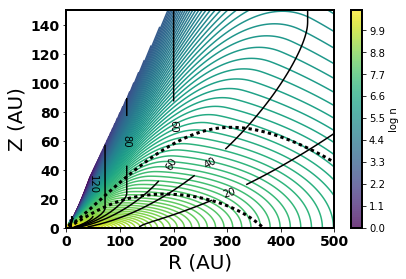

In [2]:
%matplotlib inline
x.plot_structure()

**calcH**(*verbose*=True,*return_pow*=False): Calculate the pressure scale height as a function of radius. Outputs the parameters of a power law fit to H(r). H is calculated as 2$^{-0.5}$ times the height where the density drops by 1/e, making H consistent with a density that falls off as exp(-z$^2$/2H$^2$) [*Not available in debris_disk.py*]

Set *verbose* to False to no longer output the parameters from the power law fit.

Set *return_pow* to True to return the power law parameters. Otherwise the code returns H at each value of `disk.rf`.

H100 (AU): 4.939
power law: 1.263


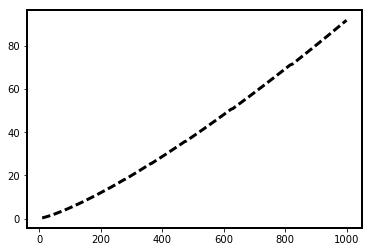

In [4]:
h=x.calcH()

plt.plot(x.rf/x.AU,h/x.AU,color='k',ls='--',lw=3)

**add_dust_ring**(*Rin,Rout,dtg,ppD,initialize*=False): Add a ring of dust with specified inner radius (R$_{in}$, in au), outer radius (R$_{out}$, in au), dust-to-gas ratio enhancement (dtg) and slope to a radial power law for the dust-to-gas ratio (ppD). The dust-to-gas ratio is taken as additive relative to any previous rings of dust. 

With `disk_pow.py` and `disk_ecc.py`, if this is the first dust ring that has been added, then specify *initialize*=True to inizialize the create the intrinsic dust-to-gas ratio parameter. [*Not available in debris_disk.py*]

disk.py:484: RuntimeWarning: divide by zero encountered in log10
  cs3 = plt.contour(self.r[0,:,:]/Disk.AU,self.Z[0,:,:]/Disk.AU,np.log10(self.rhoD[0,:,:]),100,colors='k',linestyles='--')


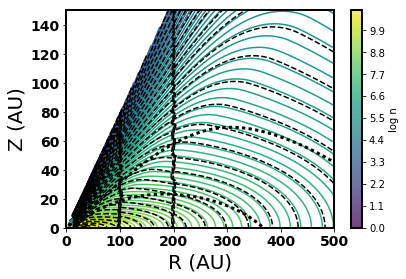

In [5]:
x.add_dust_ring(10,500,.01,0.,initialize=True)
x.add_dust_ring(100,200,.1,.5)
x.plot_structure(dust=True)

**set_line**(*line*='co',*vcs*=True): Specifiy the molecule that is being used so that the proper mass is used in the velocity broadening calculation. This is currently split between 'co' and everything else (where everything else is assumed to be DCO+). The vcs keyword specifies where the turbulent broadening is treated as proportional to the local sound speed (vcs=True) or if it is a fixed velocity, in units of km/sec (vcs=False). [*Available, but meaningless, in debris_disk.py*]

**set_rt_grid**(*vcs*=True): Construct the radiative transfer grid.

**add_dust_gap**(*Rin*,*Rout*): Add a gap within the dust, while maintaining the same total dust mass [*Only available in debris_disk.py*]

**add dust_mass**(*ring_mas*,*Rin*,*Rout*): Add an additional ring of a given mass (in Earth masses). [*Only availble in debris_disk.py*]

**add_mol_ring**(*Rin*,*Rout*,*Sig0*,*Sig1*,*abund*,*initialize*=False): Add a ring of fixed molecular abundance. The inner and outer radial boundaries are given by `Rin` and `Rout` (in units of au), while ther vertical boundaries are given by *Sig0*, *Sig1* based on the vertically intergrating surface density (similar to in the `params` list. The abundance is additive; it does not replace any previous molecular abundance within the disk, but adds on top of it. [*Available, but meaningless, in debris_disk.py*]

[*Most of the rest of these functions don't need to be called by the user, but are listed for completeness*]

**set_params**(*params*): Set the object variables associated with the elements in the params list

**set_obs**(*obs*): Set the observational object variables associated with the elements in the obs list

**set_structure**(*exp_temp*=False): Generate the temperature and density structure of the disk. This function is called when initializing the disk 

**calc_hydrostatic**(*tempg*,*siggas*,*grid*): Perform the vertical hydrostatic equilibrium calculation using the know temperature and surface density structure. [*Not available in debris_disk.py*]

**density**: Returns the mass density.

**temperature**: Returns the temperature structure.

**grid**: Returns the grid parameters.

**get_params**: Returns the params list.

**get_obs**: Returns the obs list.

**set_scale_height**(*sh_relation*,*rcf*): Set the scale height of the disk (called within set_structure within `debris_disk.py`)


# Radiative Transfer:

Once the disk has been created, the radiative transfer code can be called. There are a series of functions defined within the file raytrace.py that handle the radiative transfer (plus some ancillary things). To load these functions into your python session, use the command `run raytrace.py`

The main function is called `total_model`. This takes in a Disk object, along with a number of other parameters, and outputs a model fits image. The simplest call would be:

In [8]:
%run raytrace
total_model(x)

<string>:297: RuntimeWarning: divide by zero encountered in divide
<string>:90: RuntimeWarning: divide by zero encountered in divide
<string>:90: RuntimeWarning: invalid value encountered in divide
<string>:100: RuntimeWarning: divide by zero encountered in divide


You should now find a file called *testpy_almap.fits* which is the model fits image. 

#### Optional Parameters:

In order to accurately reproduce your data, you will need to specify the ancillary parameters. 

`imres` (default = `0.05`): Model image resolution in arcsec. This should match the pixel size in the data image.

`distance` (default = `122`): Distance to the target, in parsecs.

`chanmin` (default = `-2.24`): Minimum channel velocity in km/sec. This value is relative to the line center (ie. the minimum velocity assuming the line is centered at a velocity of 0). [*Not needed for dust-only models*]

`nchans` (default = `15`): Number of velocity channels to model. Note that `nchans` can be greater than 1 even when modeling dust emission; in this case the model image is repeated over all of the channels. 

`chanstep` (default = `0.32`): Velocity resolution of each channel, in km/sec. [*Not needed for dust-only models*]

`flipme` (default = `True`): To save time the code can calculate the radiative transfer for half of the line, and then mirror the results to fill in the rest of the line. (Make sure that nchan, chanstep and chanmin are set such that the central channel has zero velocity, otherwise flipping the line will return spurious results). [*Not needed for dust-only models*]

`Jnum` (default = `2`): The lower J quantum number of the transition of interest, e.g. for the CO J=3-2 transition, set Jnum=2. [*Not needed for dust-only models*]

`freq0` (default = `345.79599`): The rest frequency of the transition, in GHz.

`xnpix` (default = `512`): Number of pixels along each spatial dimension in the model image

`vsys` (default = `5.79`): Systemic velocity of the star, in km/sec [*Not needed for dust-only models*]

`PA` (default = `312.8`): Position angle of the disk (measured east of north) in degrees.

`offs` (default = `[0.150,0.05]`): A list containing the RA and Dec offset, in arcseconds, of the disk center relative to the phase center.

`modfile` (default=`'testpy_alma'`): Base of model file name. Resulting model image will be contained in modfile+'.fits'

`abund` (default = `1.`): Abundance relative to the abundance set in the Disk object. This is useful for e.g. modeling C18O using a Disk object that was generated with a CO abundance. [*Not needed for dust-only models*]

`obsv` (default = `None`): A list of velocities for the channels in the data. If set, the model is interpolated from the grid defined by nchans, chanstep and chanmin onto this grid. Necessary if the spectral channels of the observations are not centered on the stellar velocity. [*Not needed for dust-only models*]

`wind` (default = `False`): Include a rudimentary wind. This wind is simply a vertical motion whose speed is proportional to the local sound speed. Currently that speed is set to 0. [*Not needed for dust-only models*]

`isgas` (default = `True`): Set to `True` if line emission is being computed.

`includeDust` (default = `False`): Set to `True` to include dust emission in addition to gas emission. This is *only* necessary if you are computing the emission from gas; when computing a dust-only model you only need to specify `isgas=False`.

`bin` (default=1): This keyword will generate the spectrum based on the binning of a higher resolution model. e.g. If bin=2, then the model is generated at twice the specified resolution, and then binned down to the specified resolution. This mimics any binning that may have been done in the creation of the data, to ensure that any process that is applied to the data is also applied to the model. [*Not needed for dust-only models*]

`hanning` (default = `False`): Set to `True` to apply Hanning smoothing to a spectrum. This applies a running average that replaces the flux in channel `i` with 25% of the flux from channel `i-1`, 50% from channel `i`, and 25% from channel `i+1`. [*Not needed for dust-only models*]


A note about chanmin/chanstep/nchans and vsys: The radiative transfer portion of the code works best if the central channel corresponds to the center of the line. Using flipme without setting the central channel at line center will cause problems (e.g. it will look like the images repeat themselves halfway through the channels). The systematic velocity (vsys) is applied after the full spectrum has been generated. This means that chanmin should be the minimum velocity, assuming the line is centered at zero velocity. It should not be the minimum velocity relative to the systemic velocity. The best way to specify chanmin is simply to use -(nchans/2)*chanstep. 

The code uses the value of `Jnum` and `freq0` to know which transition is being used, and hence which molecule data file to read in. Currently the code only looks for $^{13}$CO(2-1), C$^{18}$O(2-1), DCO$^+$(3-2), HCO$^+$(4-3), HCN(4-3), CO(3-2), CS(7-6), CO(1-0), CO(2-1), CO(6-5), DCO$^+$(5-4), DCO$^+$(4-3), C$^{18}$O(3-2), and C$^{18}$O(1-0). If `Jnum` and `freq0` do not match the values for any of these lines, either because of a typo or because the desired line is not on this list, then an error will occur. 


# Likelihood Calculation:

Having made it this far there is a pretty good chance that you are interested in comparing your model image to some data. There is code that provides a framework for this, although by necessicity there is a great deal of customization based on your exact data. Below is outlined the basic functionality, and some of the areas where the code needs to be customized are pointed out.

The basic functionality is contained in the file `single_model.py`. The main functions are `make_model_vis`, `compare_vis`, `compare_vis_galario`, and `lnlike`

`make_model_vis`: Generate model visibilities, based on the baselines in a data file. **CAUTION** This function relies on the script *sample_alma.csh*, which performs the calculations using the *MIRIAD* codebase. If you have not installed *MIRIAD* then this script will fail. 

`compare_vis`: Calculate the chi-squared by comparing the model and data visibilities

`compare_vis_galario`: Generate model visibilities, and use them to calculate the chi-squared, using Galario [link]. This uses the CPU version of Galario, and saves writing the model into, and out of, the `MIRAD` data format, which saves time in the model calculation. 

`lnlike`: Calculate the log-liklihood based on a set of input model parameters. This function is used when e.g. feeding into the Markov-Chain Monte-Carlo code `EMCEE`. It essentially automates the model calculation, where the main input is a list of parameters that you wish to vary from one model to the next (e.g. turbulent velocity, midplane temperature, etc.). This function will need to be heavily modified to match your particular input data set. Once this is done, it will save a great deal of time in future model generation.

**make_model_vis**:

`datfile`: The base name of the data files. The code assumes that there is a visibility dataset named datfile+'.vis' and an image file named datfile+'.cm', both in the *MIRIAD* format. 

`modfile`: The base name of the model file. This is the same as the input to *total_model*, which would have generated a file name modfile+'.fits'. The model visibilities are named modfile+'.model.vis.fits'

`isgas` (default=True): Is this a gas emission model? If so then set this flag to True (the exact script that is called differs depending on whether or not the model has multiple channels or is a single channel.)

`freq0` (default=345.79599): Rest frequency, in units of GHz. This number is put in the header of the model file. 

**compare_vis**:

`datfile`: The base name of the data file. The code assumes that there is a visibility fits file named datfile+'.vis.fits'

`modfile`: The base name of the model file. The code assumes that there is a visibility fits file named modfile+'.model.vis.fits'

`new_weight` (default=`None`): An array containing new weights to be used in the chi-square calculation. This should have the same dimensions as the real and imaginary part of the visibilities (ie. N_base x N_chan for line data)

`systematic` (default=`False`): The systematic correction to be applied. The value sent with this keyword is used to scale down the absolute flux level of the model (the model visibilities are *divided* by this value). It is meant to mimic a true flux for the data which is larger or smaller by the supplied value (e.g. specifying systematic=1.2 is equivalent to saying that the true flux is 20% higher than what has been observed. The model visibilities are divided by 1.2 to mimic this effect). The scaling is applied to the model to ensure that the data are not adjusted in any way.

`isgas` (default=`True`): If you are dealing with data with multiple channels, set this parameter to True to ensure the data is read in correctly. 

`plot_resid` (default=`False`): Plot the distribution of residuals. If the errors are truly Gaussian, then this distribution should be Gaussian in shape. If the errors are properly scaled, then this Gaussian will have a sigma of 1. If the data perfectly matches the data then the center of this Gaussian is identically zero. This is useful for checking that the uncertainties are Gaussian (making the chi-squared a good measure of log-liklihood) and that the errors are properly scaled (to ensure a proper comparison between different models).


**compare_vis_galario**:

`datfile`: The base name of the data file. The code assumes that there is a visibility fits file named datfile+'.vis.fits'

`modfile`: The base name of the model file. The code assumes that there is a visibility fits file named modfile+'.model.vis.fits' [*Not used in this function*]

`new_weight` (default=`None`): An array containing new weights to be used in the chi-square calculation. This should have the same dimensions as the real and imaginary part of the visibilities (ie. N_base x N_chan for line data)

`systematic` (default=`False`): The systematic correction to be applied. The value sent with this keyword is used to scale down the absolute flux level of the model (the model visibilities are *divided* by this value). It is meant to mimic a true flux for the data which is larger or smaller by the supplied value (e.g. specifying systematic=1.2 is equivalent to saying that the true flux is 20% higher than what has been observed. The model visibilities are divided by 1.2 to mimic this effect). The scaling is applied to the model to ensure that the data are not adjusted in any way.

`isgas` (default=`True`): If you are dealing with data with multiple channels (either an emission line, or continuum data with multiple channels), set this parameter to True to ensure the data is read in correctly. 

`plot_resid` (default=`False`): Plot the distribution of residuals. If the errors are truly Gaussian, then this distribution should be Gaussian in shape. If the errors are properly scaled, then this Gaussian will have a sigma of 1. If the data perfectly matches the data then the center of this Gaussian is identically zero. This is useful for checking that the uncertainties are Gaussian (making the chi-squared a good measure of log-liklihood) and that the errors are properly scaled (to ensure a proper comparison between different models).